In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import import_ipynb
import import_librares # ноутбук с импортом библиотек
import func # ноутбук с функциями
import rus_ds_data # ноутбук с загрузкой и предварительной обрабткой русского датасета
from ipynb.fs.full.func import tokenize_morphy, tokenize_lancaster, tokenize_snowball
from sklearn.metrics import accuracy_score

In [56]:
from rus_ds_data import\
    df, Y, df_morphy, df_snowball, df_lancaster\
    , X1, X2, X3, batch1, batch2, batch3

In [57]:
from import_librares import CountVectorizer, TfidfVectorizer, plt, train_test_split\
,LogisticRegression, classification_report, roc_auc_score, MaxAbsScaler, GridSearchCV\
,cross_val_score, ppb, Word2Vec

In [58]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NitghtWay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
STOPWORDS_ = stopwords.words('russian')

In [60]:
def plot_cloud(wordcloud):
    # Устанавливаем размер картинки
    plt.figure(figsize=(40, 30))
    # Показать изображение
    plt.imshow(wordcloud) 
    # Без подписей на осях
    plt.axis("off")

In [61]:
text = ""
t = batch2['text']
for tx in t:
    text += tx

In [62]:
wordcloud = WordCloud(width = 2000, 
                      height = 1500, 
                      random_state=1, 
                      background_color='black', 
                      margin=20, 
                      colormap='Pastel1', 
                      collocations=False, 
                      stopwords = STOPWORDS_).generate(text)

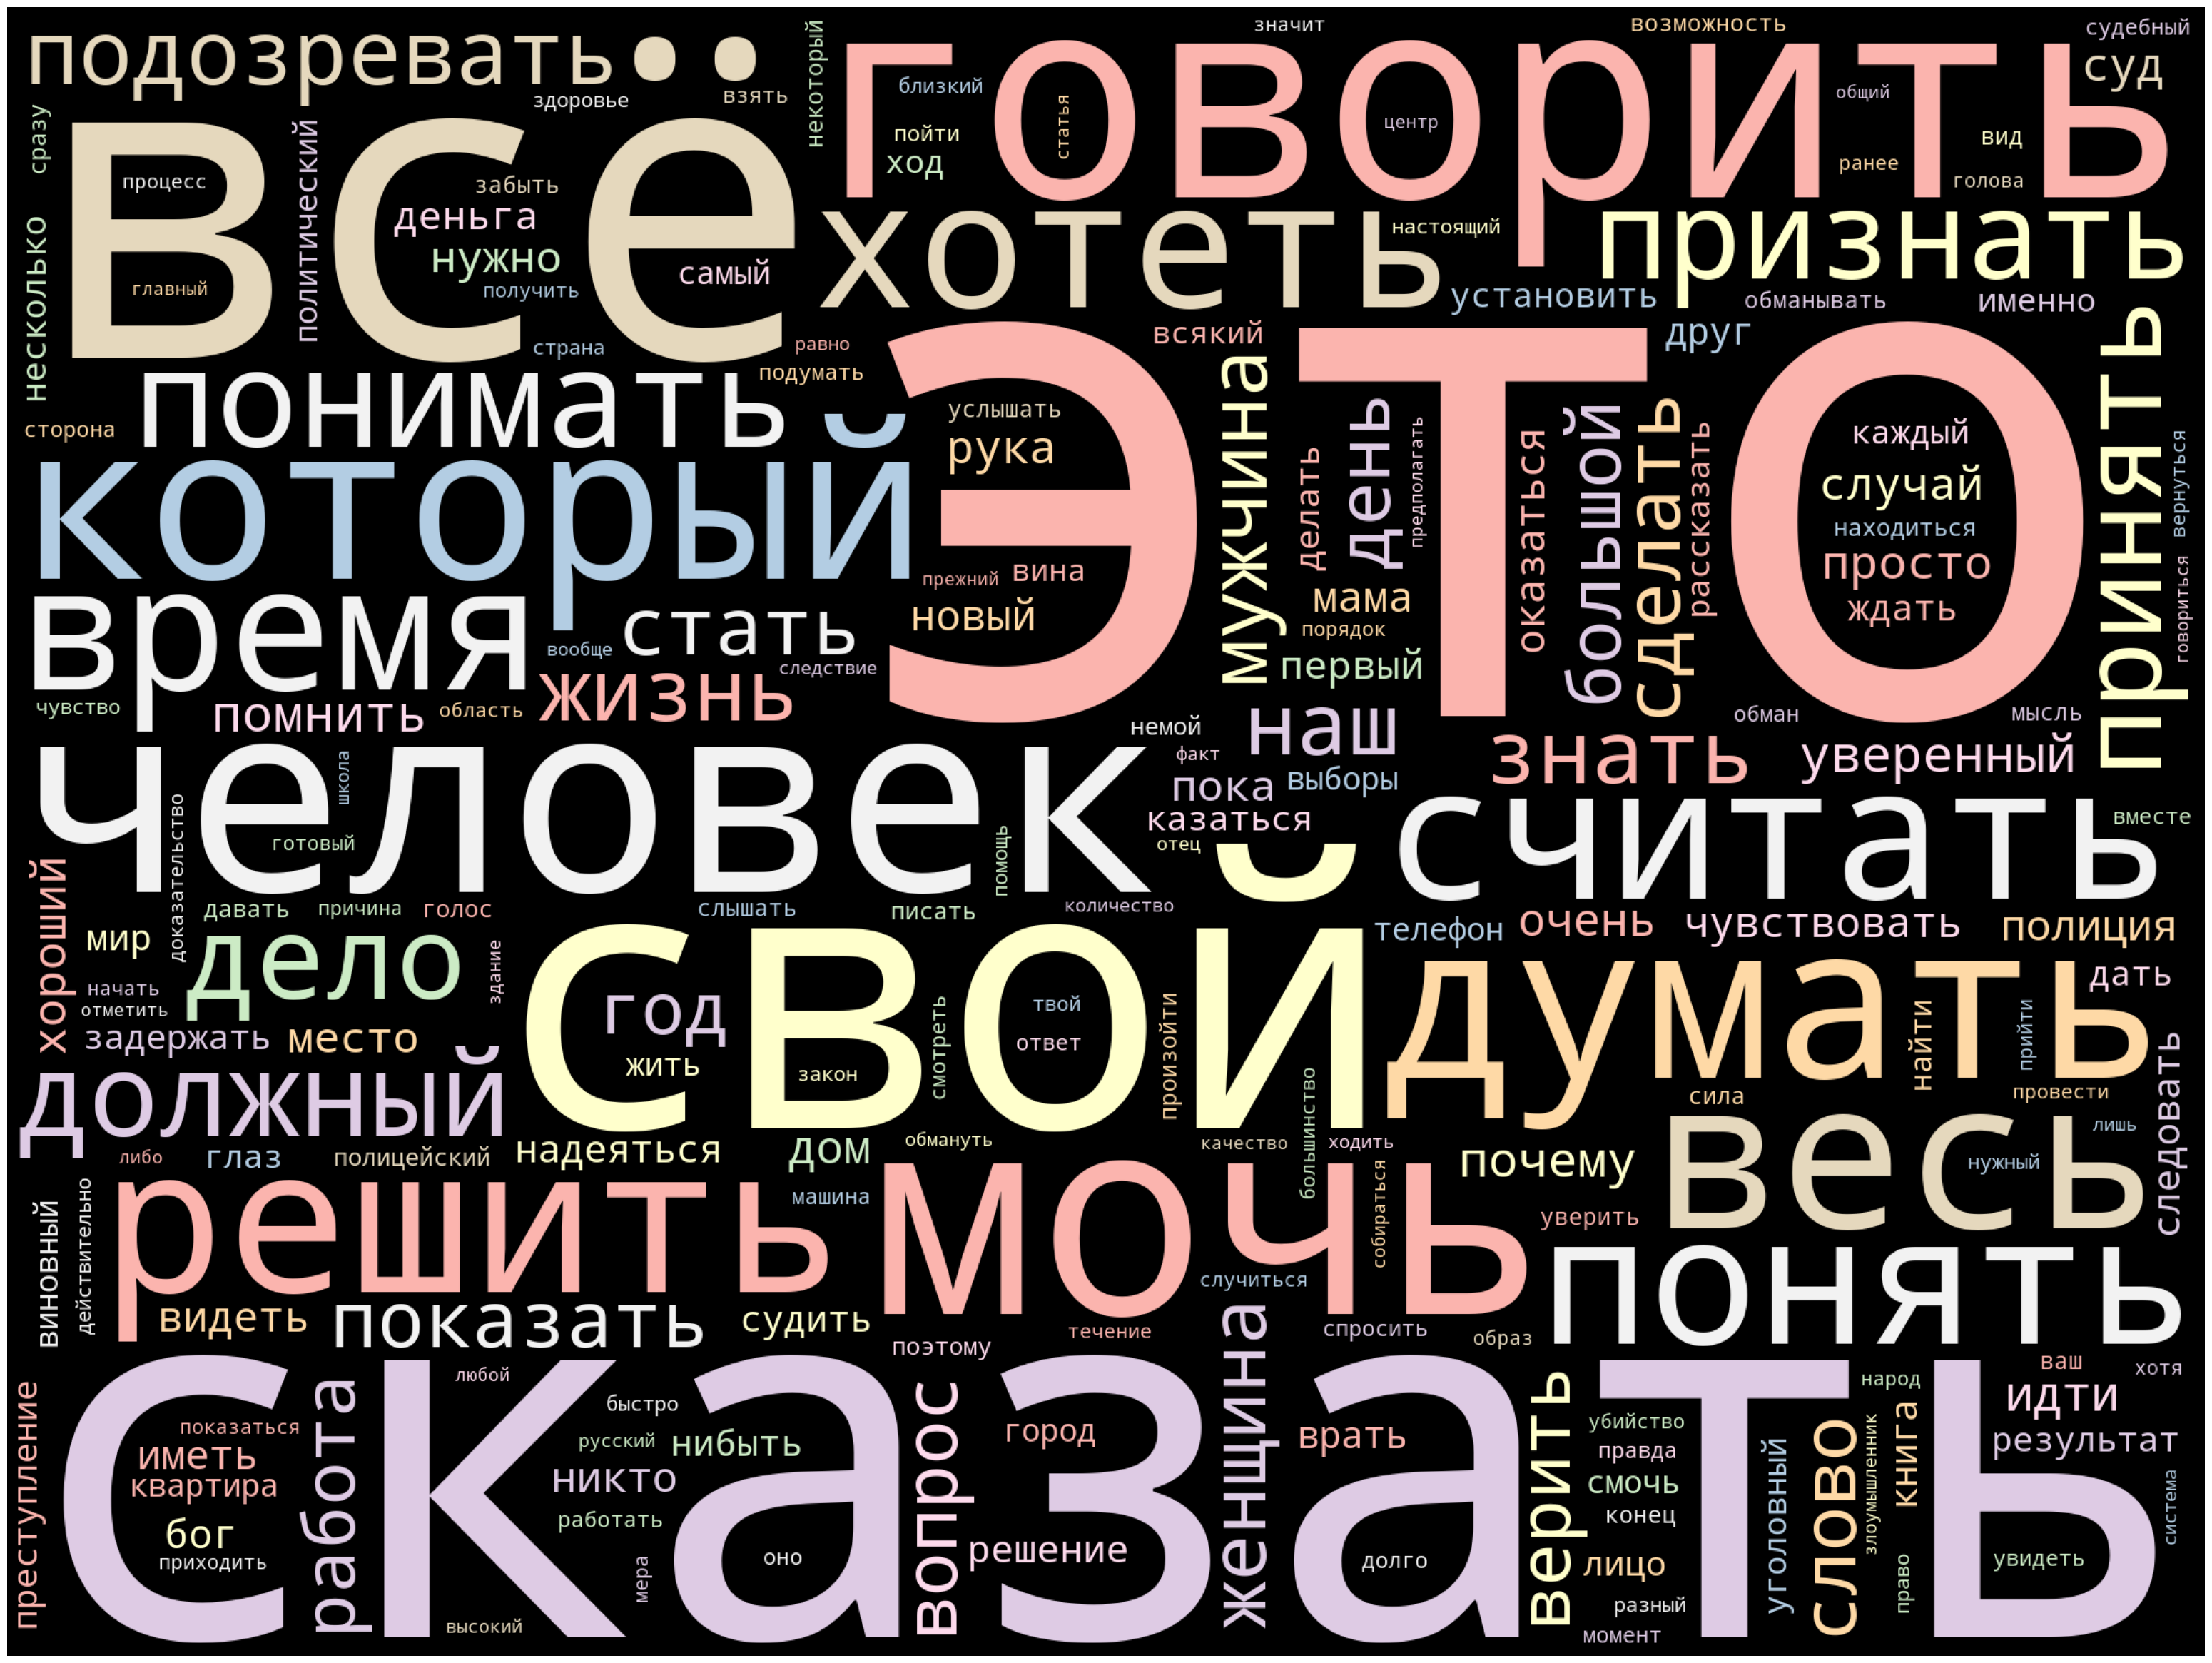

In [63]:
plot_cloud(wordcloud)

In [64]:
df = pd.read_json('C:\\course_work\\feature_extraction_NLP\\data\\news_category\\News_Category_Dataset_v3.json', lines = True)

In [65]:
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


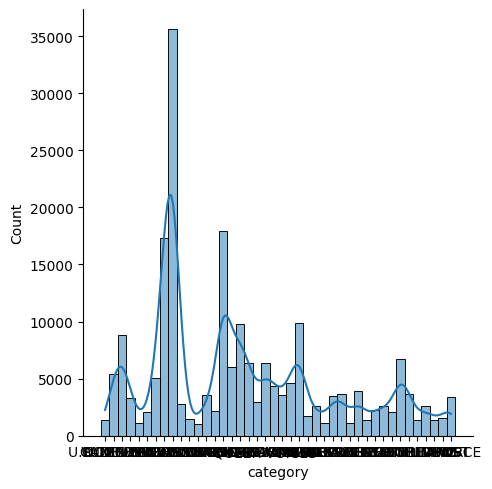

In [67]:
#pivot_table = df.groupby('category').size()
sns.displot(data=df, x = 'category', kde = True)

In [68]:
df_test = pd.read_csv('C:\\course_work\\feature_extraction_NLP\\data\\email_classifier\\SMS_test.csv', encoding='unicode_escape')
df_train = pd.read_csv('C:\\course_work\\feature_extraction_NLP\\data\\email_classifier\\SMS_train.csv', encoding='unicode_escape')

In [69]:
df_train.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [70]:
df_test.head()

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam


In [71]:
df = pd.concat([df_train, df_test])

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1082 entries, 0 to 124
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   S. No.        1082 non-null   int64 
 1   Message_body  1082 non-null   object
 2   Label         1082 non-null   object
dtypes: int64(1), object(2)
memory usage: 33.8+ KB


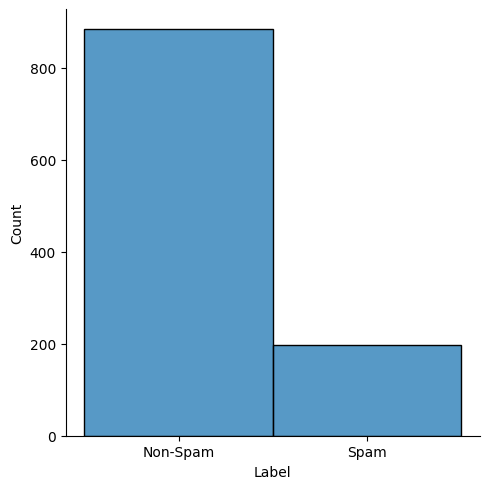

In [75]:
sns.displot(data=df, x='Label', kde = False)

In [78]:
df_train = pd.read_csv('C:\\course_work\\feature_extraction_NLP\\data\\generic_sentiment\\generic_sentiment_dataset_50k.csv')

In [79]:
df_test = pd.read_csv('C:\\course_work\\feature_extraction_NLP\\data\\generic_sentiment\\generic_sentiment_dataset_10k.csv')

In [81]:
df = pd.concat([df_test, df_train])

In [82]:
df.head()

,sentiment,text,label
0,neutral,Camera good,1
1,negative,OMG! I KNOW! I give myself a stroke everytim...,0
2,neutral,Good,1
3,positive,The company recorded revenues of E658 .1 milli...,2
4,positive,All is good,2


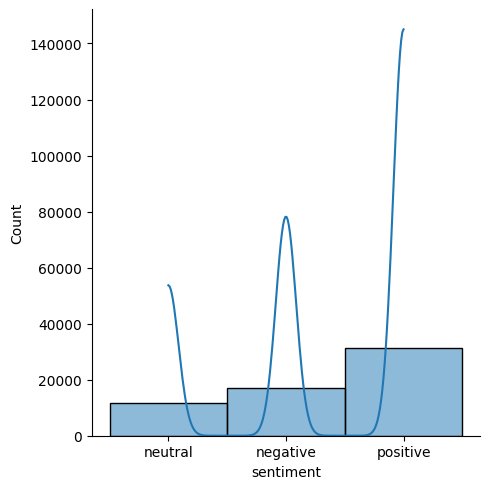

In [84]:
sns.displot(data=df, x = 'sentiment', kde = True)